In [8]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.stem import WordNetLemmatizer

import re
import contractions

pd.options.display.max_colwidth = 300

In [23]:
names = ["id","auteur","lien_auteur","nom_auteur","reclamation_examinee","date_examination","source","lien","pub_nom_auteur","pub_lien_auteur",
         "date_publication","contenu","extra_auteur","extra_contenu","extra_publication_examinée",
         "extra_mot_cle","extra_lien_reference","extra_tags","extra_titre","note_nom_alternatif","meilleure_note",
         "valeur_note","pire_note"]
df = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 1, nrows = 5000)
df2 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 5001, nrows = 5000)
df3 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 10001, nrows = 5000)
df4 = pd.read_csv('../Dataset/claim.csv', sep=',', names = names, skiprows = 15001, nrows = 5000)




In [24]:
df = pd.concat([df, df2])
df = pd.concat([df, df3])
df = pd.concat([df, df4])


In [12]:
display(df.shape)

(20000, 23)

In [25]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20000 non-null  int64  
 1   auteur                      0 non-null      float64
 2   lien_auteur                 20000 non-null  object 
 3   nom_auteur                  0 non-null      float64
 4   reclamation_examinee        20000 non-null  object 
 5   date_examination            19598 non-null  object 
 6   source                      20000 non-null  object 
 7   lien                        20000 non-null  object 
 8   pub_nom_auteur              1525 non-null   object 
 9   pub_lien_auteur             113 non-null    object 
 10  date_publication            1525 non-null   object 
 11  contenu                     19997 non-null  object 
 12  extra_auteur                20000 non-null  object 
 13  extra_contenu               2000

None

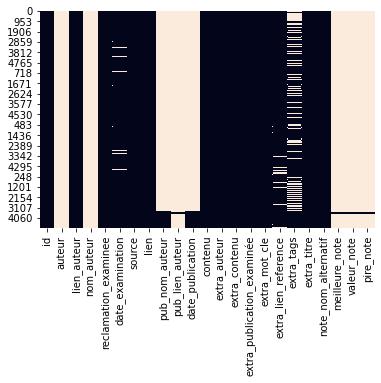

In [11]:
sns.heatmap(df.isnull(), cbar=False)

# On supprime les colonnes qui ont toutes les lignes Nan 

In [26]:
del df["auteur"]
del df["nom_auteur"]
del df["pub_nom_auteur"]
del df["pub_lien_auteur"]
del df["date_publication"]
del df["meilleure_note"]
del df["valeur_note"]
del df["pire_note"]

In [27]:
display(df.sample(1))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_auteur,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
309,5309,snopes,NASA and NOAA faked climate data in the GISTEMP global temperature record to exaggerate global warming.,2019-10-03,snopes,https://www.snopes.com/fact-check/global-warming-data-faked/,"Since 2014, climate-change deniers have squeezed millions of views, Facebook shares, and Twitter retweets by retelling a story alleging the discovery of “faked” NASA data designed to “fit a climate change narrative.” Though copied almost wholesale from a blog post, the version of the story that ...",[],"[{""id"" : 7529378"",""""begin"": 65,""end"": 73,""entity"": ""Facebook"",""text"": ""Facebook"",""score"": 0.37,""categories"" : [""Facebook"",""Android (operating system) software"",""Bada software"",""BlackBerry software"",""Blog hosting services"",""Blog software"",""Internet properties established in 2004"",""IOS software"",""...","[{""id"" : 18426568"",""""begin"": 0,""end"": 4,""entity"": ""NASA"",""text"": ""NASA"",""score"": 0.61,""categories"" : [""NASA"",""Government agencies established in 1958"",""1958 establishments in the United States"",""Organizations based in Washington, D.C."",""Government of the United States""]},{""id"" : 37876"",""""begin"":...",[],"https://www.buzzfeednews.com/article/stephaniemlee/inside-the-internets-war-on-science,http://archive.fo/2ooBC,http://archive.fo/KaYnc,https://skepticalscience.com/understanding-adjustments-to-temp-data.html,https://data.giss.nasa.gov/gistemp/,https://cdiac.ess-dive.lbl.gov/trends/temp/hansen/,h...",NaN,Was Global Warming Data ‘Faked’ to ‘Fit Climate Change Fictions’?,False


Nouveau nombre de lignes et colonnes 

In [28]:
display(df.shape)

(20000, 15)

In [29]:
display(df["extra_auteur"].describe())

count     20000
unique      657
top          []
freq      18696
Name: extra_auteur, dtype: object

In [30]:
del df["extra_auteur"]

In [31]:
for column in df :
    print(column)
    display(df[column].describe())
    print("___________________")
    

id


count    20000.000000
mean      8590.781250
std       5599.143886
min          0.000000
25%       3474.750000
50%       8474.500000
75%      13474.250000
max      18474.000000
Name: id, dtype: float64

___________________
lien_auteur


count      20000
unique         2
top       snopes
freq       18475
Name: lien_auteur, dtype: object

___________________
reclamation_examinee


count                                                                                                       20000
unique                                                                                                      14297
top       NASA and NOAA faked climate data in the GISTEMP global temperature record to exaggerate global warming.
freq                                                                                                         1132
Name: reclamation_examinee, dtype: object

___________________
date_examination


count          19598
unique          4331
top       2019-10-04
freq            2267
Name: date_examination, dtype: object

___________________
source


count      20000
unique         2
top       snopes
freq       18475
Name: source, dtype: object

___________________
lien


count                                                                  20000
unique                                                                 14336
top       https://www.snopes.com/fact-check/bill-nye-arrested-illegal-drugs/
freq                                                                    1132
Name: lien, dtype: object

___________________
contenu


count                                                                                                                                                                                                                                                                                                           19997
unique                                                                                                                                                                                                                                                                                                          14317
top       On Oct. 3, 2019, an image supposedly showing a tweet from Monica Lewinsky saying she was willing to “take one for (the) team” (and perform oral sex) in order to get U.S. President Donald Trump impeached started to circulate on social media:This is not a genuine tweet from Lewinsky. Lewinsky is t...
freq                                                                  

___________________
extra_contenu


count                                                                                                                                                                                                                                                                                                           20000
unique                                                                                                                                                                                                                                                                                                          14264
top       [{"id" : 19948",""begin": 55,"end": 70,"entity": "Monica Lewinsky","text": "Monica Lewinsky","score": 0.55,"categories" : ["1973 births","Alumni of the London School of Economics","American expatriates in the United Kingdom","American fashion businesspeople","American fashion designers","America...
freq                                                                  

___________________
extra_publication_examinée


count     20000
unique     9806
top          []
freq       5420
Name: extra_publication_examinée, dtype: object

___________________
extra_mot_cle


count     20000
unique     5039
top          []
freq      13516
Name: extra_mot_cle, dtype: object

___________________
extra_lien_reference


count                                                                                                                                                                                                                                                                                                           18632
unique                                                                                                                                                                                                                                                                                                          12875
top       https://twitter.com/redsteeze/status/1179914912543363072?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1179914912543363072&ref_url=https%3A%2F%2Fwww.newsweek.com%2Feat-babies-twitter-reacts-alexandria-ocasio-cortez-town-hall-meeting-1463114,https://twitter.com/realdonaldtrump/status/11799...
freq                                                                  

___________________
extra_tags


count           14175
unique           7187
top       ASP Article
freq             1511
Name: extra_tags, dtype: object

___________________
extra_titre


count                       20000
unique                      14279
top       The Sound of Apocalypse
freq                         1132
Name: extra_titre, dtype: object

___________________
note_nom_alternatif


count     19992
unique      128
top       False
freq       7250
Name: note_nom_alternatif, dtype: object

___________________


In [33]:
df.drop_duplicates(subset=["source","contenu","note_nom_alternatif","date_examination"],keep='first', inplace=True)

In [34]:
for column in df :
    print(column)
    display(df[column].describe())
    print("___________________")

id


count    14320.000000
mean      8287.350698
std       5687.074306
min          0.000000
25%       2911.750000
50%       7991.500000
75%      13291.250000
max      18454.000000
Name: id, dtype: float64

___________________
lien_auteur


count      14320
unique         2
top       snopes
freq       12798
Name: lien_auteur, dtype: object

___________________
reclamation_examinee


count                                                                                                              14320
unique                                                                                                             14297
top       The Allman Brothers Band’s album title Eat a Peach is a reference to Duane Allman’s fatal motorcycle accident.
freq                                                                                                                   3
Name: reclamation_examinee, dtype: object

___________________
date_examination


count          13918
unique          4331
top       2019-10-11
freq             156
Name: date_examination, dtype: object

___________________
source


count      14320
unique         2
top       snopes
freq       12798
Name: source, dtype: object

___________________
lien


count                                                                         14320
unique                                                                        14320
top       https://www.snopes.com/fact-check/did-netflix-announce-god-of-war-series/
freq                                                                              1
Name: lien, dtype: object

___________________
contenu


count                                                                                                                                                                                                                                                                                                           14317
unique                                                                                                                                                                                                                                                                                                          14317
top       In April 2018, American comedian and actor Bill Cosby was convicted of felony sexual assault on a woman who had accused him of drugging and sexually abusing her years before (one of dozens who made similar allegations). Cosby was sentenced to three to 10 years in a state prison and is currently ...
freq                                                                  

___________________
extra_contenu


count     14320
unique    14264
top          []
freq         56
Name: extra_contenu, dtype: object

___________________
extra_publication_examinée


count     14320
unique     9806
top          []
freq       4284
Name: extra_publication_examinée, dtype: object

___________________
extra_mot_cle


count     14320
unique     5039
top          []
freq       7843
Name: extra_mot_cle, dtype: object

___________________
extra_lien_reference


count                            12955
unique                           12875
top       /sources/language/oxford.htm
freq                                 8
Name: extra_lien_reference, dtype: object

___________________
extra_tags


count           13022
unique           7187
top       ASP Article
freq             1504
Name: extra_tags, dtype: object

___________________
extra_titre


count       14320
unique      14278
top       Tsunami
freq            3
Name: extra_titre, dtype: object

___________________
note_nom_alternatif


count     14312
unique      128
top       False
freq       4980
Name: note_nom_alternatif, dtype: object

___________________


In [35]:
display(df.sample(1))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_contenu,extra_publication_examinée,extra_mot_cle,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
243,10243,snopes,A scientist missing for over 20 years was found living in a secret drug lab in a Minnesota couple's basement.,2015-05-18,snopes,https://www.snopes.com/fact-check/fake-news-missing-scientist-found/,"On 17 May 2015 the web site IFLScience.org published an article reporting that a scientist who had been missing for more than 20 years had been found hiding in a secret drug lab he’d established in a Minnesota couple’s basement:17 MayIFLScience.org20 yearsA Couple from Cottage Grove, Minnesota d...","[{""id"" : 122041"",""""begin"": 270,""end"": 293,""entity"": ""Cottage Grove, Minnesota"",""text"": ""Cottage Grove, Minnesota"",""score"": 0.50,""categories"" : [""Cities in Minnesota"",""Populated places in Washington County, Minnesota"",""Minnesota populated places on the Mississippi River"",""Populated places establi...",[],"[{""id"" : 843491"",""""begin"": 0,""end"": 24,""entity"": ""Not Necessarily the News"",""text"": ""Not Necessarily The News"",""score"": 0.50,""categories"" : [""HBO network shows"",""American sketch comedy television shows"",""Satirical television programmes"",""Television series about television"",""1980s American televi...","http://www.iflscience.com/,https://www.facebook.com/IFeakingLoveScience,http://bangordailynews.com/2014/06/30/news/augusta/augusta-man-gets-20-years-in-1976-murder/",Not Necessarily The News,Scientist Missing for Over 20 Years Found Living Inside Secret LSD Drug Lab Hidden in Basement,False


In [36]:
df = df.drop(["extra_contenu","extra_publication_examinée","extra_mot_cle"], axis=1)

In [37]:
display(df.sample(1))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
2331,17331,snopes,In 1555 Nostradamus predicted that December 2000 would see “the village idiot will come forth to be acclaimed the leader in the home of greatest power.”,2007-03-21,snopes,https://www.snopes.com/fact-check/the-village-idiot/,"Claim: In 1555 Nostradamus predicted that December 2000 would see “the village idiot will come forth to be acclaimed the leader in the home of greatest power.” Claim:Claim:Status: False.Status: False.Status:Status:False.False.False.Example: [Collected on the Internet, 2000]Example:Exampl...",NaN,"ASP Article, george w bush, Important If True",Nostradamus Prophecy,False


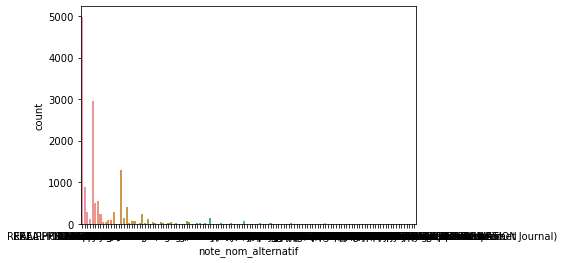

In [38]:
sns.countplot(x='note_nom_alternatif', data=df)

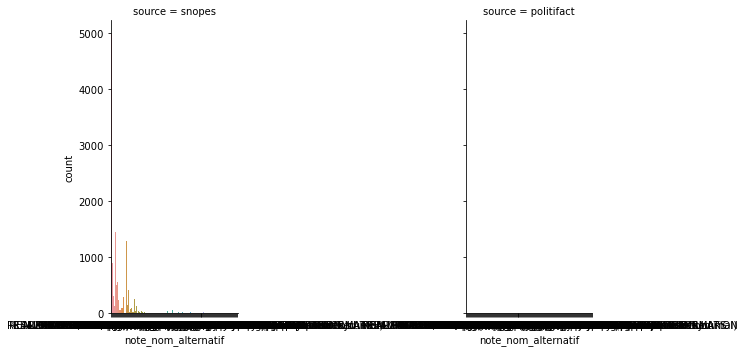

In [39]:
sns.catplot(x='note_nom_alternatif', col='source', kind='count', data=df)

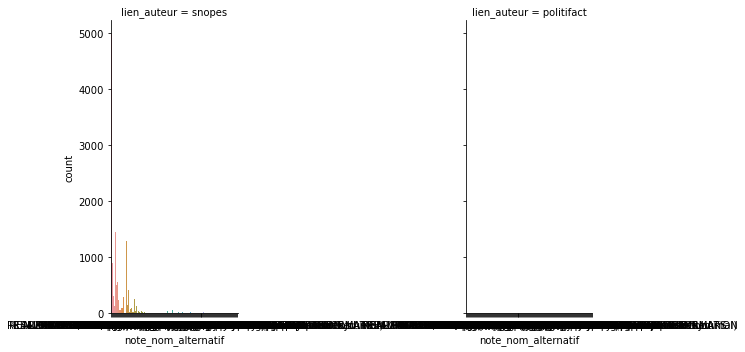

In [40]:
sns.catplot(x='note_nom_alternatif', col='lien_auteur', kind='count', data=df)

In [41]:
def toLower(mot) :
    return str(mot).lower()

In [42]:
df["note_nom_alternatif"] = df["note_nom_alternatif"].apply(toLower)

In [45]:
display(df.sample(1))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_lien_reference,extra_tags,extra_titre,note_nom_alternatif
452,452,snopes,"Rep. Frederica Wilson advocated prosecuting persons who """"make fun of Congress"""" online.",2019-07-10,snopes,https://www.snopes.com/fact-check/frederica-wilson-online-congress/,"On July 2, 2019, amidst a controversy over the conditions at migrant detention centers, U.S. Rep. Frederica Wilson of Florida led a congressional delegation that toured the Homestead Temporary Shelter in Homestead, Florida, a 3,200-bed migrant children’s detention center operated by a private, f...","https://www.washingtonpost.com/immigration/2019/07/08/un-human-rights-chief-deeply-shocked-by-migrant-detention-center-conditions-texas/,https://miami.cbslocal.com/2019/07/02/frederica-wilson-congressional-delegation-inspect-homestead-facility/,https://www.npr.org/2019/02/13/694138106/inside-the...",NaN,Did Rep. Frederica Wilson Advocate Prosecuting People Who ‘Make Fun’ of Congress?,mixture


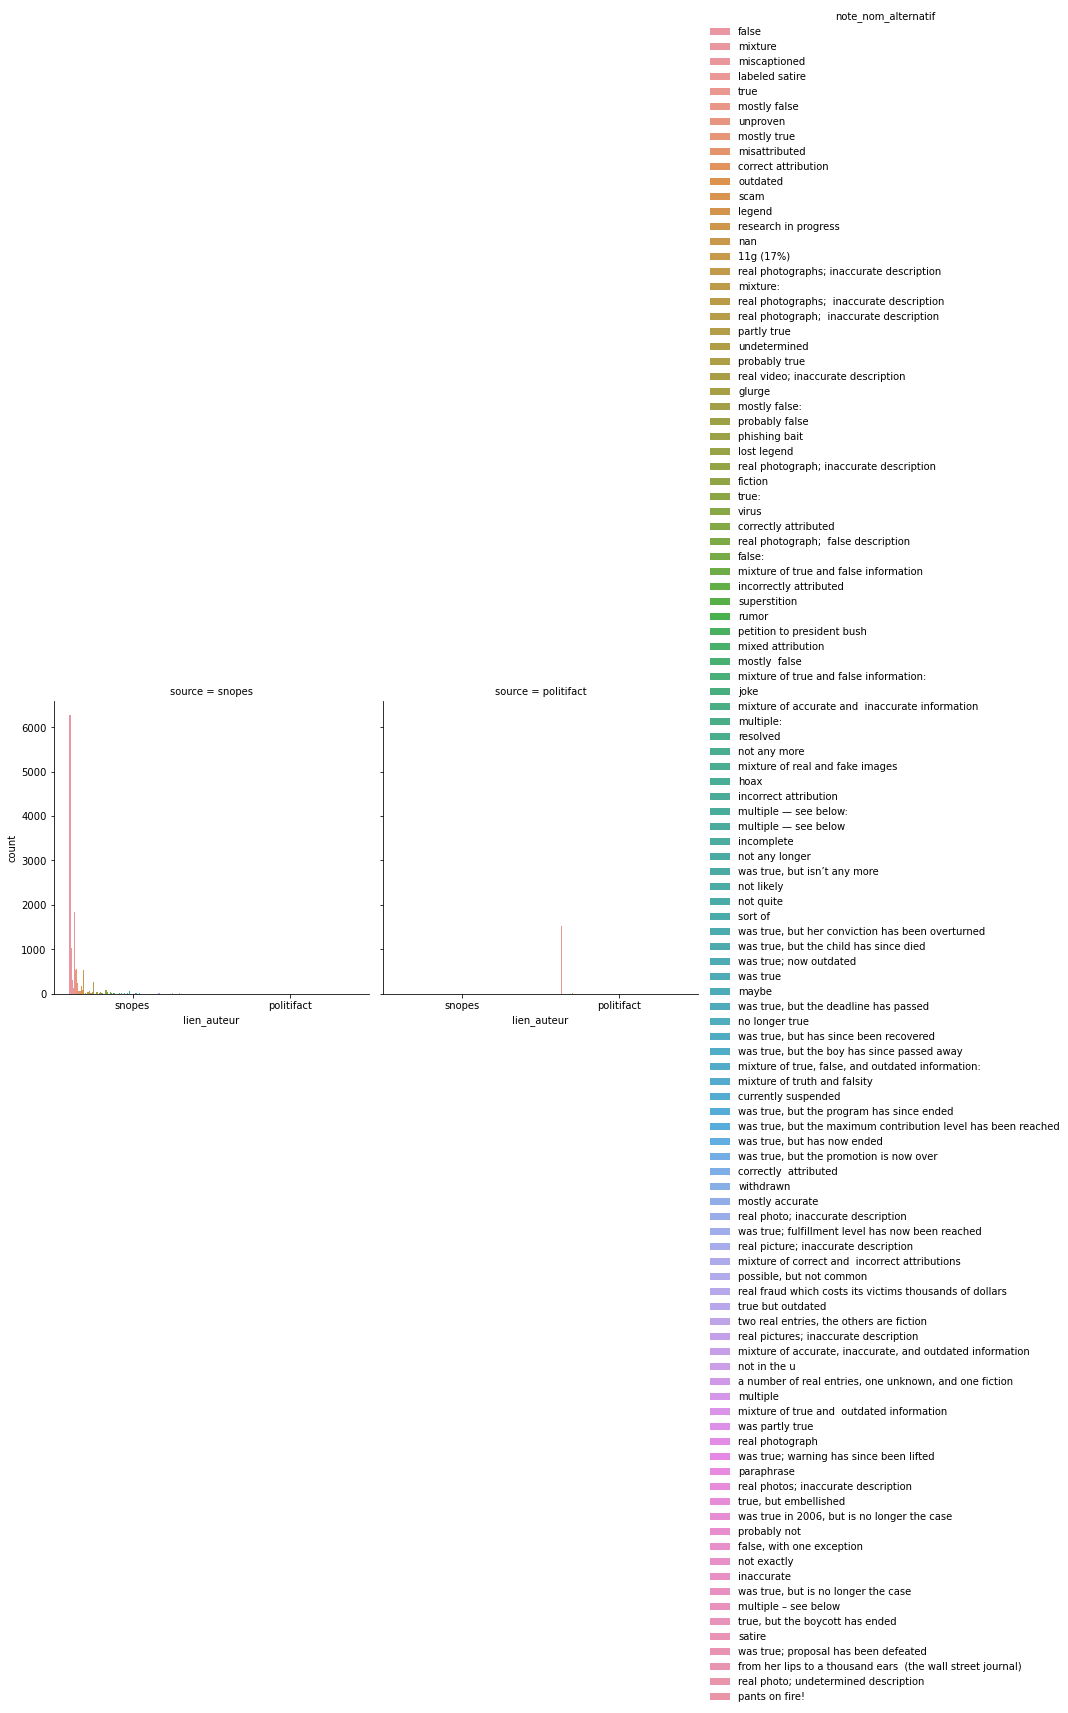

In [46]:
sns.catplot('lien_auteur',
data=df,
kind='count',
hue='note_nom_alternatif',
col='source')

In [56]:
df.info()
df2=df.copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14320 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    14320 non-null  int64 
 1   lien_auteur           14320 non-null  object
 2   reclamation_examinee  14320 non-null  object
 3   date_examination      13918 non-null  object
 4   source                14320 non-null  object
 5   lien                  14320 non-null  object
 6   contenu               14317 non-null  object
 7   extra_lien_reference  12955 non-null  object
 8   extra_tags            13022 non-null  object
 9   extra_titre           14320 non-null  object
 10  note_nom_alternatif   14320 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


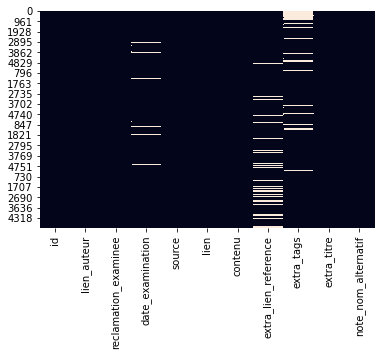

In [57]:
sns.heatmap(df.isnull(), cbar=False)

In [58]:
del df2["extra_lien_reference"]
del df2["extra_tags"]

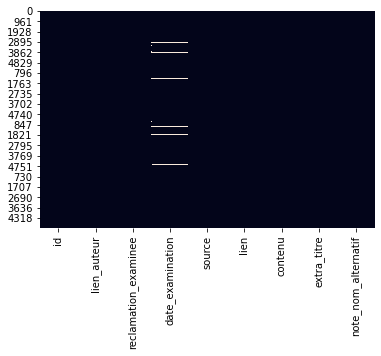

In [63]:
sns.heatmap(df2.isnull(), cbar=False)

In [64]:
df2=df2.dropna()
display(df2.sample(1))
display(df2.info())
display(df2.shape)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_titre,note_nom_alternatif
3116,13116,snopes,A list of “Communist Rules for Revolution” was discovered by Allied forces in Germany in 1919.,2013-08-02,snopes,https://www.snopes.com/fact-check/communist-rules-for-revolution/,"Claim: A list of “Communist Rules for Revolution” was discovered by Allied forces in Germany in 1919. Claim:Claim:FALSEFALSEFALSEFALSEFALSEFALSEFALSEExample: [Collected via e-mail, June 2007]Example:Example:[Collected via e-mail, June 2007][Collected via e-mail, June 2007]Origins: A time-h...",Communist Rules for Revolution,false


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13916 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    13916 non-null  int64 
 1   lien_auteur           13916 non-null  object
 2   reclamation_examinee  13916 non-null  object
 3   date_examination      13916 non-null  object
 4   source                13916 non-null  object
 5   lien                  13916 non-null  object
 6   contenu               13916 non-null  object
 7   extra_titre           13916 non-null  object
 8   note_nom_alternatif   13916 non-null  object
dtypes: int64(1), object(8)
memory usage: 652.3+ KB


None

(13916, 9)

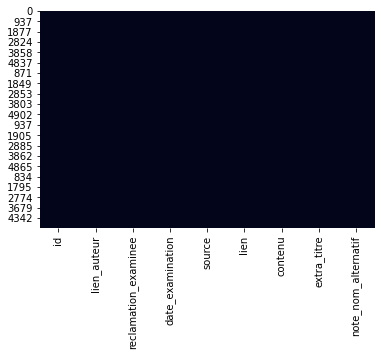

In [65]:
sns.heatmap(df2.isnull(), cbar=False)

In [66]:
df21 = df2[df2.note_nom_alternatif == 'false']
df22 = df2[df2.note_nom_alternatif == 'true']
df23 = df2[df2.note_nom_alternatif == 'mixture']

df3 = pd.concat([df21, df22])
df3 = pd.concat([df3,df23])

In [67]:
df3.sample(2)

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_titre,note_nom_alternatif
2181,17181,snopes,Telemarketers are luring those who’ve signed up for the national “Do Not Call” list by getting them to request coupons for free products.,2007-12-03,snopes,https://www.snopes.com/fact-check/call-scam/,"Claim: Telemarketers are luring those who’ve signed up for the national “Do Not Call” list by getting them to request coupons for free products.Claim:Claim:Status: True.Status: True.Status:Status:True.True.True.Example: [Collected on the Internet, 2003]Example:Example:[Collected on the I...",Call Scam,true
3038,3038,snopes,Russia built a monument to memorialize the genocide of indigenous peoples on the American continent outside the United States Embassy in Russia.,2018-03-27,snopes,https://www.snopes.com/fact-check/did-russia-monument-native-americans-moscow/,"On 14 November 2015, a series of English language and Russian language social media accounts appeared online with the sole purpose of promoting a new petition on the web site Change.org. That petition called for the construction of a monument to recognize the destruction of Native American commu...",Did Russia Erect a Monument to Native Americans in Front of the United States Embassy in Moscow?,false


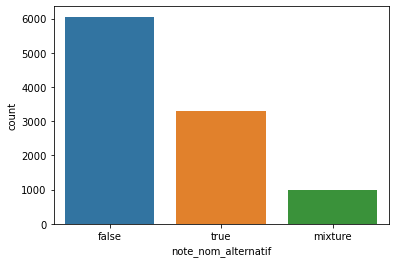

In [68]:
sns.countplot(x='note_nom_alternatif', data=df3)


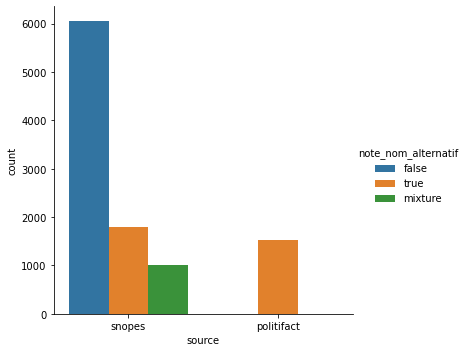

In [69]:
sns.catplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [70]:
class_label_encoder = LabelEncoder()
# transformation

df3["source"]=class_label_encoder.fit_transform(df3["source"])

In [71]:
display(df3.sample(2))

,id,lien_auteur,reclamation_examinee,date_examination,source,lien,contenu,extra_titre,note_nom_alternatif
4848,4848,snopes,A nine-foot-long bull shark was found in Kentucky Lake.,2017-06-27,1,https://www.snopes.com/fact-check/bull-shark-kentucky-lake/,"In June 2017, fake news web site React365 posted a captioned photo of a shark fin peeking out of a body of water with the headline “Bull Shark Spotted in Kentucky Lake”:fakepostedSlight though it was, the page got a lot of play on social media — partly, we hope, in recognition of its humorous in...",Bull Shark Spotted in Kentucky Lake?,false
755,10755,snopes,Drinking cold water after meals causes unpleasant and lasting side effects.,2006-08-23,1,https://www.snopes.com/fact-check/drinking-cold-water-meals-cause-cancer/,"Admonitions against the ingestion of cold beverages immediately following meals first surfaced on the Internet in February 2006, when they first appeared as an item tagged onto a diatribe against the eating of too much rice:Drinking Cold water after meal = Cancer!For those who like to drink cold...",Does Drinking Cold Water After Meals Cause Cancer?,false


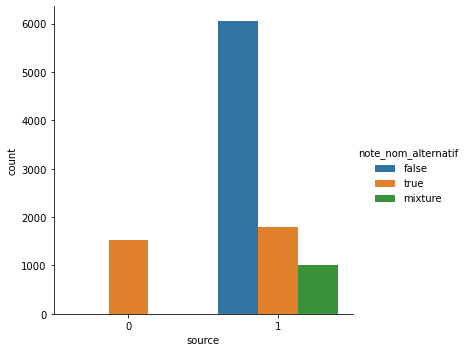

In [72]:
sns.catplot('source',
data=df3,
kind='count',
hue='note_nom_alternatif')

In [73]:
del df3["lien_auteur"]
del df3["id"]
del df3["lien"]

In [75]:
df3.sample(1)

,reclamation_examinee,date_examination,source,contenu,extra_titre,note_nom_alternatif
1693,A 97-year-old victim of an October 2018 synagogue shooting in Pittsburgh was a Holocaust survivor.,2018-10-28,1,"On the morning of 27 October 2018, a gunman killed 11 worshippers at the Tree of Life synagogue in Pittsburgh, Pennsylvania, the deadliest attack ever on Jews in the United States. Police took a 46-year-old man named Robert Bowers into custody in connection with the massacre, whom law enforceme...",Was Pittsburgh Synagogue Shooting Victim Rose Mallinger a Holocaust Survivor?,false


In [76]:
df3.to_csv('../Dataset/claim2.csv',sep=',', index=False)

# Sauvegarde 1

In [77]:
df4 = pd.read_csv('../Dataset/claim2.csv', sep=',')

In [78]:
df4.sample(2)

,reclamation_examinee,date_examination,source,contenu,extra_titre,note_nom_alternatif
2802,A video shows a man angrily renouncing his faith on Egyptian national television.,2016-07-05,1,"On 3 July 2016, the YouTube channel NBT Films (Nothing But the Truth) shared a video purportedly showing an “Arab guy” angrily renouncing his faith on live television:NBT FilmsRecently, an Arab TV station discussed the controversial book ‘The People vs Muhammad’. The result was an explosive melt...",‘Arab Guy’ Renounces Faith on Egyptian Television?,false
5434,A serial killer/rapist is luring women with $5 bills they’ve ‘dropped.’,2009-03-17,1,Claim: A serial killer/rapist is luring women with $5 bills they’ve ‘dropped.’ Claim:Claim:FALSEFALSEFALSEFALSEFALSEFALSEFALSEExamples: Examples:Examples:Variations: Variations:Variations: A version that began circulating in July 2003 changed the line:to: The claim “This happened in Tallah...,Serial Killer/ Rapist Trick,false


In [46]:
df4["date_examination"].value_counts()

2019-10-11    122
2019-10-10    114
2019-10-09    112
2019-10-14    106
2019-10-15     85
             ... 
2012-10-09      1
2010-03-27      1
1997-06-03      1
2015-07-10      1
2007-12-19      1
Name: date_examination, Length: 3286, dtype: int64

In [80]:
"""

On ne s'en sert pas finalement, on a gardé l'année et le mois de la date

def parsing_date_y(row) :
    try :
        return str(row[:4])
    except ValueError :
        print("ALLLLLOOOO")

        
df4["date_examination_y"] = df4["date_examination"].apply(parsing_date_y)

"""

'\ndef parsing_date_y(row) :\n    try :\n        return str(row[:4])\n    except ValueError :\n        print("ALLLLLOOOO")\n\n        \ndf4["date_examination_y"] = df4["date_examination"].apply(parsing_date_y)\n\n'

In [81]:
#df4["date_examination_y"].value_counts()


In [82]:
def parsing_date_m(row) :
    try :
        return str(row[:7])
    except ValueError :
        print("Erreur de date")
        
df4["date_examination_m"] = df4["date_examination"].apply(parsing_date_m)

In [84]:
df4.sample(2)

,reclamation_examinee,date_examination,source,contenu,extra_titre,note_nom_alternatif,date_examination_m
4781,The Mormons own the Coca-Cola Company.,2012-08-27,1,"Claim: The Mormons own the Coca-Cola Company.Claim:Claim:FALSEFALSEFALSEFALSEFALSEFALSEFALSEOrigins: The Coca-Cola Company is far too sizeable a business entity for any one person or group to own, even if that group were Bill Gates and Kerry Packer. Big Red is a publicly traded company (New ...",Mormon Ownership of Coca-Cola,false,2012-08
5632,Osama bin Laden owns Citibank.,2008-03-08,1,"Claim: Osama bin Laden owns Citibank.Claim:Claim:Status: False.Status: False.Status:Status:False.False.False.Example: [Collected on the Internet, 2001]Example:Example:[Collected on the Internet, 2001][Collected on the Internet, 2001]Origins: The confluence of three factors (Osama bin L...",Osama bin Laden and Citibank,false,2008-03


In [85]:
df4["date_examination_m"].value_counts()

2019-10    805
2016-10    181
2016-08    176
2016-09    158
2016-03    155
          ... 
1995-09      1
1997-02      1
1997-10      1
1999-08      1
1996-03      1
Name: date_examination_m, Length: 271, dtype: int64

In [86]:
df5 = df4.copy()
df5 = df5[["reclamation_examinee","date_examination_m", "source","contenu","note_nom_alternatif"]]
df5["date_examination_m"]=class_label_encoder.fit_transform(df5["date_examination_m"])
df5.rename(columns={"reclamation_examinee": "fact", "date_examination_m": "date","note_nom_alternatif": "note" }, inplace=True)

In [87]:
df5.sample(2)

,fact,date,source,contenu,note
3565,The body of a homeless man found behind a Jamaica fast food restaurant was identified as that of Bob Marley.,214,1,"On 31 January 2015, the fake news web site Empire News published an article positing the body of a homeless man discovered in San Diego was found through DNA testing to be that of singer Elvis Presley. Five months later, the Richmond Globe followed up with a similar article positing that the bo...",false
10348,An account accurately describes the rapes and murders of Christopher Newsom and Channon Christian and the reporting thereof.,121,1,"On 6 January 2007, Knoxville, Tennessee, residents Christopher Newsom, Jr., 23, and Channon Christian, 21, went out for a dinner date at a local restaurant, then headed to a friend’s house to watch a movie. They never came back.Newsom, Jr.,When the couple had failed to return by the following ...",mixture


# Premier test classifieur

In [55]:
array = df5.values
X = array[:,1:2]
y = array[:,4]

In [56]:
validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30
X_train, X_test, y_train, y_test = train_test_split(X, y,
train_size=validation_size,
random_state=seed,test_size=testsize)

In [57]:
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
print('\n accuracy :',
accuracy_score(result, y_test),'\n')


 accuracy : 0.5990033222591362 



In [58]:
seed = 7
scoring = 'accuracy'
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFO', RandomForestClassifier()))

In [59]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)

KNN: 0.223492 (0.162198)
CART: 0.186516 (0.143682)
NB: 0.516744 (0.484301)
SVM: 0.177330 (0.142368)
RFO: 0.180818 (0.141879)


# Découpage du fact en phrases ou mots (+suppr des non-alphanum)

In [191]:
df5.sample(2)

,fact,date,source,contenu,note
7234,"""""Drone technology now allows an individual to be recorded in their homes by drones as small as birds and immediately uploaded to the internet.""""",260,0,"On April 1, 2014 state Rep. Chris Taylor warned the citizenry about eyes in the sky and attacks on privacy.'Drone technology now allows an individual to be recorded in their homes by drones as small as birds and immediately uploaded to the internet,' the Madison Democrat wrote in a news release....",true
7943,The Trump administration blocked public access to USDA reports on safety and hygiene standards at facilities where animals are kept and bred.,241,1,"In March 2018, various outlets reported that the administration of President Donald Trump had ended public access to the details of inspections that the United States Department of Agriculture performs on animal breeders. In an article headlined “Trump blocks access to puppy mill inspections as ...",mixture


In [28]:
# //////////////////////////////////////////////////////////
# ON UTILISE PAS

def toPhrases(row) :
    phrases = sent_tokenize(sans_contract)
    return phrases


# /////////////////////////////////////////////////////////

In [33]:
pattern = re.compile('[\W_]+')


stop_words =['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also',' ','',',','.','!','?',':','\'','\"','\"\"','\'\'','  ','\t','\s']


def que_alphanum(mot):
    return pattern.sub('', mot)


def toMots(row) :
    sans_contract = contractions.fix(row)
    tokens = word_tokenize(sans_contract)
    words = [que_alphanum(word) for word in tokens if word not in stop_words]
    return words



In [193]:
df5["fact_mots"] = df5["fact"].apply(toMots)
df5.sample(2)

,fact,date,source,contenu,note,fact_mots
3858,Video clip captures NFL kicker Shaun Suisham booting a 110-yard practice field goal.,191,1,"Claim: Video clip captures NFL kicker Shaun Suisham booting a 110-yard practice field goal.Claim:Claim:FALSEFALSEFALSEFALSEFALSEFALSEFALSEExample: [Collected via e-mail, June 2008]Example:Example:[Collected via e-mail, June 2008][Collected via e-mail, June 2008]Origins: The video clip disp...",false,"[Video, clip, captures, NFL, kicker, Shaun, Suisham, booting, 110yard, practice, field, goal]"
1901,Abortion rates drop during Democratic presidencies and rise during Republican administrations.,225,1,"In 1969, the Centers for Disease Control and Prevention (CDC) began collecting nationwide data on the numbers of abortions, the abortion ratio (abortions versus live births), and the abortion rate (abortions versus the US population of women aged 15-44 years old).collectingWhile these data are n...",false,"[Abortion, rates, drop, Democratic, presidencies, rise, Republican, administrations]"


In [194]:
df5.to_csv('../Dataset/claim3.csv',sep=',', index=False)

# Sauvegarde 2

In [71]:
df6 = pd.read_csv('../Dataset/claim3.csv', sep=',')
df6.sample(1)

,fact,date,source,contenu,note,fact_mots
799,"Police discovered a drug lab in the back room of a Walmart in Decatur, Alabama.",238,1,"On 10 December 2017, the web site ufconly.com published an article appearing to report that police had discovered a methamphetamine lab in the back room of a Walmart in Decatur, Alabama:publishedPolice were recently tipped off to a reported meth lab that was being run by Walmart employees in wha...",false,"['Police', 'discovered', 'drug', 'lab', 'back', 'room', 'Walmart', 'Decatur', 'Alabama']"


In [72]:

wordnet_lemmatizer = WordNetLemmatizer()

def toMotLem(row) :
    listPhrase = []
    sans_contract = contractions.fix(row)
    phrases = sent_tokenize(sans_contract)
    tokens = [word_tokenize(phr) for phr in phrases]
    for token in tokens :
        for word in token :
            if (word not in stop_words) :
                listPhrase.append(que_alphanum(word))
    listLem = [wordnet_lemmatizer.lemmatize(listmot,pos='v') for listmot in listPhrase]
    return listLem

In [73]:
df6["fact_LEM"] = df6["fact"].apply(toMotLem)

In [75]:
df6["contenu"] = df6["contenu"].apply(toMotLem)

In [78]:
df6.sample(2)

,date,source,contenu,note,fact_LEM
77,251,1,"[A, junk, news, website, contribute, new, fictional, wrinkle, saga, onagain, offagain, 2019, State, Union, address, report, 31, January, Speaker, House, Nancy, Pelosi, order, President, Trump, enter, Capitol, Building, event, back, doorreportingPelosi, already, postpone, annual, address, blame, ...",false,"[youS, Speaker, House, Nancy, Pelosi, order, President, Trump, enter, Capitol, Building, rear, kitchen, entrance, deliver, 2019, State, Union, address]"
1675,227,1,"[On, 29, January, 2017, web, site, Politicot, publish, article, include, allege, , polarize, , quote, youS, President, Donald, Trump, , White, House, senior, adviser, KellyAnne, Conway, Politicot, , So, want, call, racist, Well, , I, say, label, racist, small, price, pay, great, make, entire, co...",false,"[KellyAnne, Conway, say, label, racist, small, price, pay, make, country, , great]"


In [77]:
del df6["fact_mots"]
del df6["fact"]

In [79]:
df6.to_csv('../Dataset/claim4.csv',sep=',', index=False)

# Sauvegarde 3

In [80]:
df7 = pd.read_csv('../Dataset/claim4.csv', sep=',')
df7.sample(1)

,date,source,contenu,note,fact_LEM
1061,234,1,"['On', '23', 'August', '2017', 'comedy', 'web', 'site', 'Funny', 'Die', 'post', 'article', 'appear', 'report', 'Harry', 'Potter', 'series', 'author', 'JK', 'Rowling', 'take', 'vengeance', 'Twitter', 'critic', 'buy', 'home', '', 'Two', 'years', 'ago', '', 'article', 'say', '', 'Rowling', 'tweet',...",false,"['Harry', 'Potter', 'author', 'JK', 'Rowling', 'exact', 'revenge', 'Twitter', 'critic', 'monitor', 'finance', 'two', 'years', 'buy', 'home']"


In [82]:
df7 = df7[["date","source", "fact_LEM","contenu","note"]]

In [83]:
df7.sample(1)

,date,source,fact_LEM,contenu,note
7357,260,0,"['', '', 'State', 'law', 'say', 'state', 'appraise', 'piece', 'property', 'pay', 'certain', 'amount', 'appraisal']","['Plans', 'build', 'new', '', '1', 'billion', 'stadium', 'downtown', 'Atlanta', 'may', 'sound', 'like', 'project', 'limitless', 'cash', 'But', 'boundaries', 'concern', 'spend', 'accord', 'key', 'player', 'effortAtlanta', 'Mayor', 'Kasim', 'Reed', 'recently', 'take', 'radio', 'discuss', 'fracture...",true
